In [4]:
import nltk

In [5]:
# nltk.download_shell()

In [6]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [7]:
print(len(messages))

5574


In [1]:
pwd

'C:\\Users\\Ahsan Zeb\\DataScience'

In [2]:
# cd 

C:\Users\Ahsan Zeb


In [4]:
cd Downloads/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing

C:\Users\Ahsan Zeb\Downloads\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing


In [8]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
import pandas as pd

In [10]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', 
                      names=['label','message'] )

In [11]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

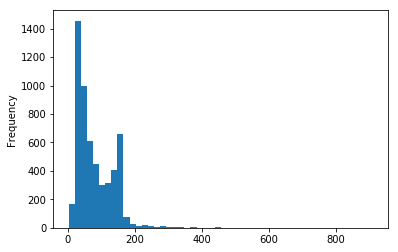

In [16]:
messages['length'].plot(bins=50, kind='hist')

In [17]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017719FBBBE0>,
      dtype=object)

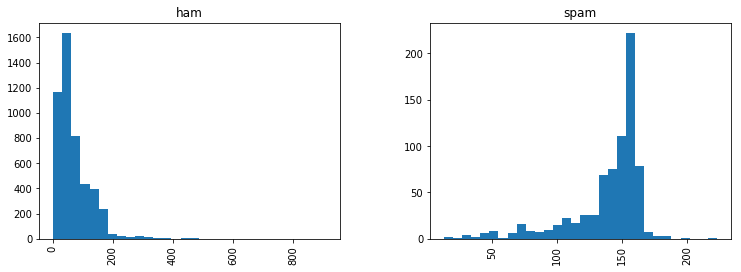

In [19]:
messages.hist(column='length', by='label', bins=30, figsize=(12,4))

In [20]:
# Text Preprocessing 
import string

mess = 'Sample message! notice: it has punctuation.'

# checking for puchtuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the character again to form the string 
nopunc = ''.join(nopunc) 

In [21]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [22]:
nopunc.split()

['Sample', 'message', 'notice', 'it', 'has', 'punctuation']

In [23]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
clean_mess

['Sample', 'message', 'notice', 'punctuation']

In [25]:
def text_process(mess):
    # taking a string , removing all punctuations and stopwords 
    # return a list of cleaned text
    
    # check if punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # join the character again to form string. 
    nopunc = ''.join(nopunc)
    # now just remove any stopwords
    return [word for word in nopunc.split() if word in stopwords.words('english')]

In [26]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# check to make sure its working
messages['message'].head(5).apply(text_process) 

0    [until, only, in, there]
1                          []
2         [in, a, to, to, to]
3                  [so, then]
4          [he, to, he, here]
Name: message, dtype: object

In [28]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# Vectorization

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

#print total number of vocab words 
print(len(bow_transformer.vocabulary_)) 

130


In [32]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [33]:
# vector representation
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 88)	1
  (0, 97)	1
(1, 130)


In [34]:
print(bow_transformer.get_feature_names()[88])
print(bow_transformer.get_feature_names()[77])

so
or


In [35]:
messages_bow = bow_transformer.transform(messages['message'])

In [36]:
print('Shape of sparse matrix', messages_bow.shape)
print('Amount of Non-Zero occurance', messages_bow.nnz)

Shape of sparse matrix (5572, 130)
Amount of Non-Zero occurance 23439


In [37]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 3


In [43]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 97)	0.7531611412701149
  (0, 88)	0.6578360702186359


In [44]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

KeyError: 'u'

In [45]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 130)


In [46]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [47]:
# Training model
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [48]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [49]:
from sklearn.metrics import classification_report
print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94      4825
        spam       0.97      0.21      0.35       747

   micro avg       0.89      0.89      0.89      5572
   macro avg       0.93      0.61      0.64      5572
weighted avg       0.90      0.89      0.86      5572



In [50]:
from sklearn.model_selection import train_test_split

In [51]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [52]:
# Create a pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [53]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001771A681BF8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [54]:
predictions = pipeline.predict(msg_test)

In [55]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.90      0.95      1084
        spam       0.21      0.94      0.35        31

   micro avg       0.90      0.90      0.90      1115
   macro avg       0.60      0.92      0.65      1115
weighted avg       0.98      0.90      0.93      1115



In [56]:
# Practice 2 from online 

In [35]:
text = """Backgammon is one of the oldest known board games.
Its history can be traced back nearly 5,000 years to archeological discoveries
in the Middle East. It is a two player game where each player has fifteen checkers 
which move between twenty-four points according to the roll of two dice."""

In [36]:
sentences = nltk.sent_tokenize(text)
for sentence in sentences:
    print(sentence)
    print()

Backgammon is one of the oldest known board games.

Its history can be traced back nearly 5,000 years to archeological discoveries
in the Middle East.

It is a two player game where each player has fifteen checkers 
which move between twenty-four points according to the roll of two dice.



In [37]:
import nltk
# nltk.download('punkt') 

In [39]:
pwd

'C:\\Users\\Ahsan Zeb\\Downloads\\Refactored_Py_DS_ML_Bootcamp-master\\20-Natural-Language-Processing'

In [40]:
import nltk

In [8]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [10]:
twenty_train.target_names
print("\n".join(twenty_train.data[0].split("\n")[:3])) 

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() 
X_train_counts = count_vect.fit_transform(twenty_train.data) 
X_train_counts.shape

(11314, 130107)

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer() 
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [17]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [19]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [21]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.7738980350504514

In [23]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_svm', SGDClassifier(loss='hinge', alpha=1e-3, n_iter=5))
]) 

_ = text_clf_svm.fit(twenty_train.data, twenty_train.target)

predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.8236856080722251

In [25]:
# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
}

In [ ]:
# gs_clf = GridSearchCV(text_clf, parameters, n_jobs=1)
# gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [ ]:
# gs_clf.best_score_
# gs_clf.best_param_

In [41]:
# Example 3
# Scikit learn Working With Text Data

In [42]:
import nltk

In [1]:
from nltk.corpus import stopwordsords

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

In [13]:
txt = """Sukanya, Rajib and Naba are my good friends.
    Sukanya is getting married next year. 
    Marriage is a big step in one’s life.
    It is both exciting and frightening. 
    But friendship is a sacred bond between people.
    It is a special kind of love between us.
    Many of you must have tried searching for a friend 
    but never found the right one."""

In [14]:
txt

'Sukanya, Rajib and Naba are my good friends.\n    Sukanya is getting married next year. \n    Marriage is a big step in one’s life.\n    It is both exciting and frightening. \n    But friendship is a sacred bond between people.\n    It is a special kind of love between us.\n    Many of you must have tried searching for a friend \n    but never found the right one.'

In [17]:
tokenized = sent_tokenize(txt)
for i in tokenized:
    wordList = [w for w in wordList if not w in stop_words]
    
    tagged = nltk.pos_tag(wordList)
    print(tagged)

NameError: name 'wordList' is not defined

In [18]:
# NLP Project

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [20]:
pwd

'C:\\Users\\Ahsan Zeb\\DataScience'

In [22]:
cd Downloads/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing

C:\Users\Ahsan Zeb\Downloads\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing


In [23]:
data = pd.read_csv('yelp.csv')

In [24]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [26]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [27]:
data['text length'] = data['text'].apply(len)

In [29]:
data.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

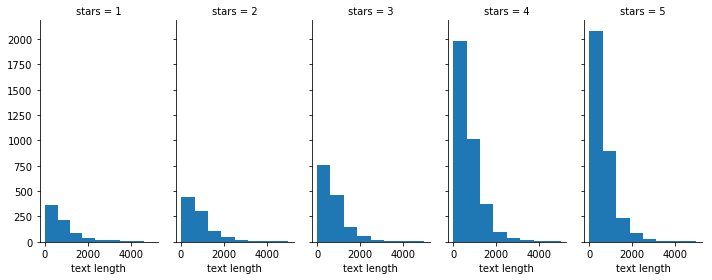

In [46]:
g = sns.FacetGrid(data, col='stars', height=4, aspect=.5)
g = g.map(plt.hist, 'text length', bins=8) 

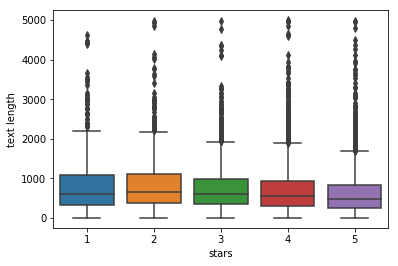

In [48]:
sns.boxplot(x='stars', y='text length',data=data)

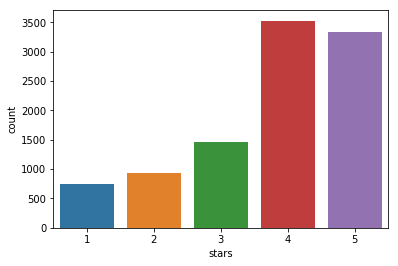

In [52]:
sns.countplot(x='stars', data=data)

In [58]:
# cool	useful	funny	text length
df = pd.DataFrame(data.groupby(by='stars')['cool','useful','funny','text length'].mean()) 

In [59]:
df

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [60]:
df.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


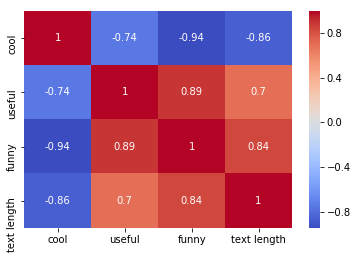

In [67]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [84]:
yelp_class = pd.DataFrame(data[(data['stars']==1) | (data['stars']==5)])

In [87]:
yelp_class.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [88]:
data[(data['stars']==1) | (data['stars']==5)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [89]:
X = yelp_class['text']
y = yelp_class['stars']

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
cv = CountVectorizer() 

In [92]:
cv.fit_transform(X)

<4086x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 317288 stored elements in Compressed Sparse Row format>

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [108]:
from sklearn.naive_bayes import MultinomialNB

In [109]:
nb = MultinomialNB()

In [106]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features=3, 
handle_unknown='ignore')
onehotencoder.fit(X_train, y_train)

IndexError: tuple index out of range

In [110]:
nb.fit(X_train, y_train)

ValueError: could not convert string to float: 'My fiance and I tried the place because of a Groupon.  We live in the same neighborhood and see the place all the time but the look of the place was never enough to draw us in.  There is nothing eye catching about the business front at all.  It\'s in a strip mall and looks old.  At night, they turn on strands of tacky Christmas lights that only attract attention to the fact that the lights are so poorly hung.\n\nWhen we arrived for dinner we were greeted by an empty corridor, no host station and no host.  We could see what looked to be a bar but it wasn\'t a bar that I\'d want to eat, drink and socialize at.  To pass the time until we were finally greeted we browsed the many framed publications touting how incredible the place was.  I\'m already here...I don\'t need any more persuasion.  It\'s time for the Chef/owner to take down the "look how good I was" trophy wall and go with a more inviting modern look.\n\nWe were greeted by friendly gentleman who seated us on the main lower floor.  He handed us our menus and asked if he could get us something to drink.  There is no drink menu on the menu.  No beer list, no soda list, no liquid period.  We asked to see the wine list, which had only bottle prices and doesn\'t even hint that they sell wine by the glass.  Once I asked if they had beer and sold wine by the glass it was like we made a breakthrough.   The menu seems a bit outdated so I  went with the Lasagna, the basics.  While we sat waiting for our meal, the salads came.  Weird...the menu didn\'t mention anything about a salad nor did the waiter.   More lack of information from the menu.\n\nNow on to the decor.  It is terribly outdated.  Tacky, bland, pale paint scheme, brass fixtures, mirrors and cliche wine bottles.  There were beautiful fresh flowers throughout which we really enjoyed.  I was unfortunately seated directly in front of two paintings both with a woman and a little girl drinking what appears to be wine.  I\'m guessing they are personal family paintings but they are horribly out of place and bordering on creepy.  I couldn\'t take my eyes off of them and that distracted me throughout the night.  This place needs a makeover, new modern paint scheme and some updating on the artwork.\n\nThe lasagna came.  It was OK at best.  I tried my fiance\'s chicken genevese at it was horrible.  The chicken tasted like it was boiled which is an instant dish killer for me.  We did not take our leftovers.  We asked for the check and it came with a after dinner cordial which was a nice surprise and tasted delicious. \n\nWe won\'t be back.  To be honest Oregano\'s lasagna is better by far.'

In [100]:
predictions = nb.predict(X_test)

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

In [121]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

NameError: name 'predictions' is not defined

In [114]:
from sklearn.feature_extraction.text import TfidfTransformer

In [115]:
from sklearn.pipeline import Pipeline

In [116]:
pipe_line = ([
    ('covt', CountVectorizer(tokenizer=)),
    ('tfidf', TfidfTransformer()),
    ('nb', MultinomialNB())
])

In [117]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [118]:
pipe_line.fit(X_train, y_train)

AttributeError: 'list' object has no attribute 'fit'

In [119]:
pred = pipe_line.predict(X_test)

AttributeError: 'list' object has no attribute 'predict'

In [122]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

NameError: name 'pred' is not defined